# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [16]:
# Checking the number of mice.
num_mice = mouse_metadata["Mouse ID"].nunique()
print(f"{num_mice}")

249


In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(f"{duplicate_mice}")

['g989']


In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
to_remove = duplicate_mouse_data.index
cleaned_data = merged_data.drop(to_remove)
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [48]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
print(f"{num_mice_cleaned}")

248


## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})


summary_stats.columns = [
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Tumor Volume Variance",
    "Tumor Volume Std. Dev.",
    "Tumor Volume Std. Err."
]

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

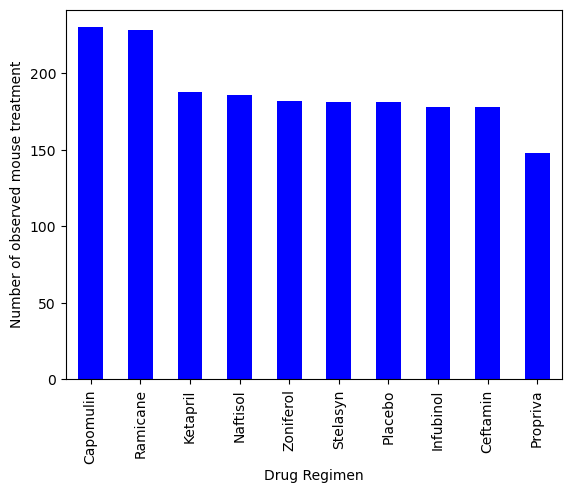

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='blue')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of observed mouse treatment')

# Display the plot
plt.show()

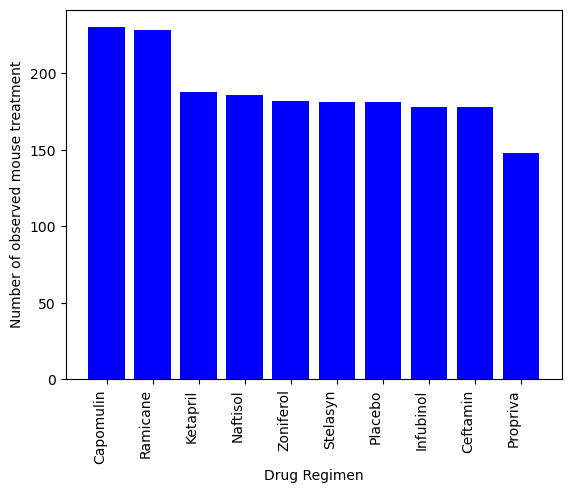

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()
regimen_names = regimen_counts.index
row_counts = regimen_counts.values
plt.bar(regimen_names, row_counts, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of observed mouse treatment')
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.show()

<Axes: ylabel='count'>

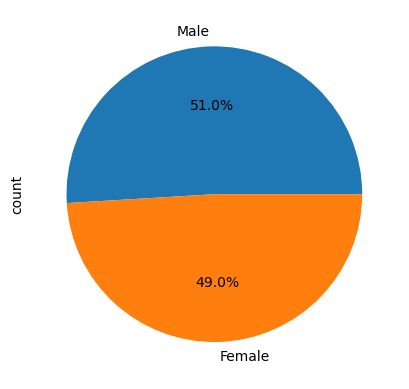

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_data["Sex"].value_counts()
sex_counts.plot(kind="pie",autopct="%1.1f%%")

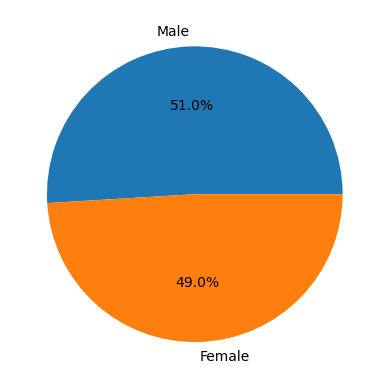

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = cleaned_data["Sex"].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(target_regimens)]
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()
final_timepoint_df = pd.DataFrame({'Timepoint': max_timepoints}).reset_index()
final_tumor_volume_df = pd.merge(final_timepoint_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [75]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


tumor_vol_data = []
for regimen in target_regimens:
  
    regimen_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
   
    tumor_vol_data.append(regimen_data)
    
    
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
   
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
   
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
   
    print(f"{regimen}'s potential outliers: {outliers}")






Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


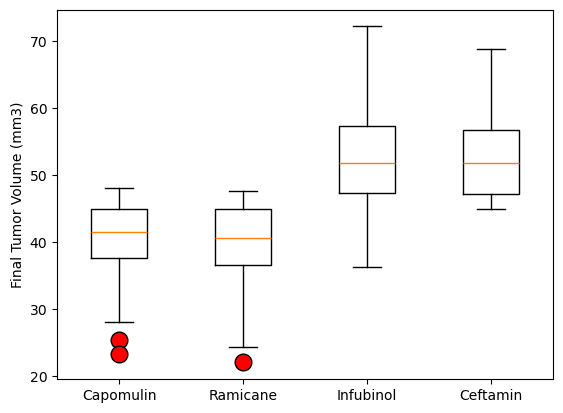

In [80]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# List of the specified treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = []

for treatment in treatments:
    treatment_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    tumor_vol_data.append(treatment_data)
box = plt.boxplot(tumor_vol_data, labels=treatments, sym="r")
for flier in box["fliers"]:
    flier.set(marker="o", markersize=12, markeredgecolor="black")  

plt.ylabel("Final Tumor Volume (mm3)")

# Show the plot
plt.show()


## Line and Scatter Plots

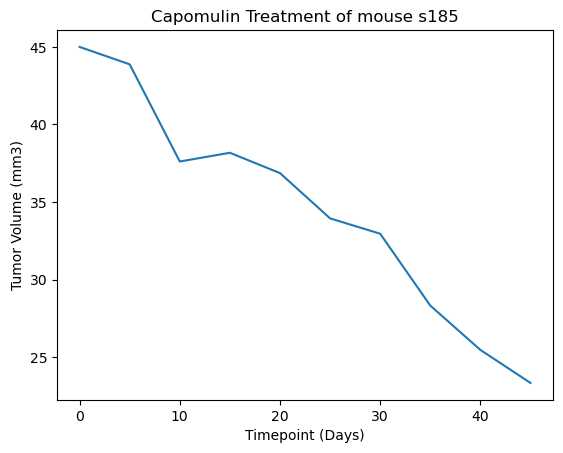

In [84]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "s185"
mouse_data = cleaned_data[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == mouse_id)]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of mouse {mouse_id}")

# Show the plot
plt.show()

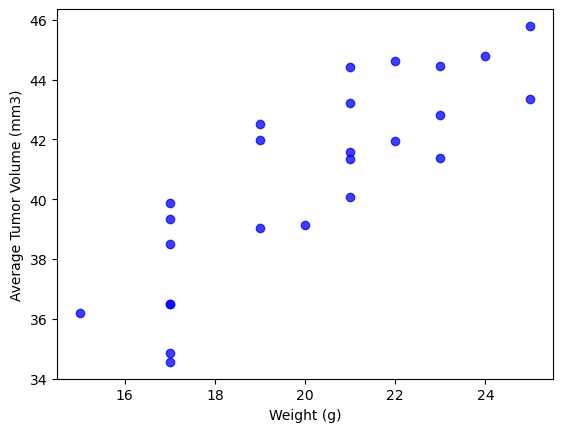

In [88]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_merged = pd.merge(average_tumor_volume, mouse_metadata, on="Mouse ID")
weight = capomulin_merged["Weight (g)"]
tumor_volume = capomulin_merged["Tumor Volume (mm3)"]
plt.scatter(weight, tumor_volume, marker="o", facecolors="blue", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the avg tumor volume is 0.84


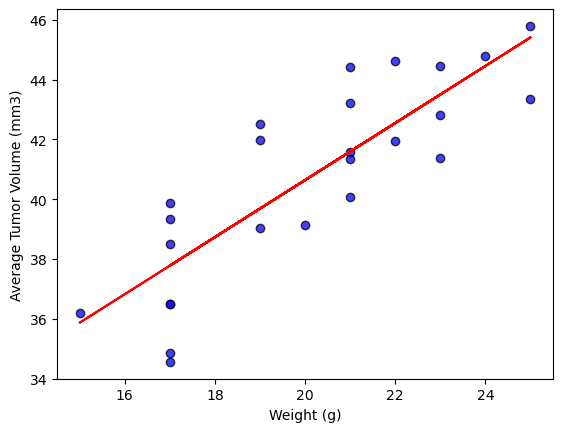

In [102]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress 

capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

capomulin_merged = pd.merge(average_tumor_volume, mouse_metadata, on="Mouse ID")
weight = capomulin_merged["Weight (g)"]
tumor_volume = capomulin_merged["Tumor Volume (mm3)"]
correlation_coefficient = round(st.pearsonr(weight, tumor_volume)[0], 2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = slope * weight + intercept

plt.scatter(weight, tumor_volume, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(weight, regress_values, "r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the avg tumor volume is {correlation_coefficient}")

# Show plot
plt.show()